# [Goulib](../notebook.ipynb).expr

math expressions
(see [polynomials](polynomials.ipynb) for more)

In [1]:
from Goulib.notebook import *
from Goulib.expr import *
from math import pi,sin

3x+2


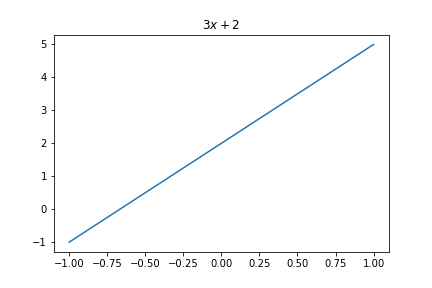

In [2]:
e1=Expr('3*x+2') #a very simple expression defined from text
print(e1) # Expr can be printed as text
e1 # but is rendered as laTeX by default

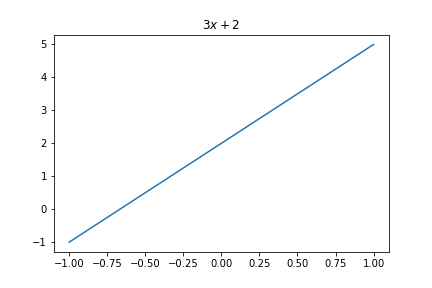

In [3]:
e1=Expr(lambda x:3*x+2) #the same expression defined from a lambda function
e1

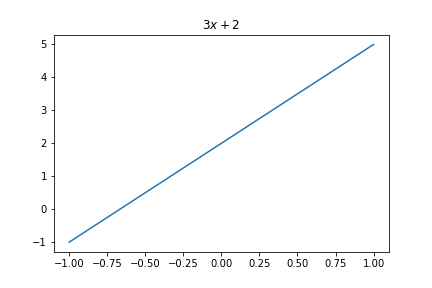

In [4]:
def f(x):
    return 3*x+2
g=f # this works because g is the same as f :-)
Expr(g) #the same expression defined from a regular (simple...) function

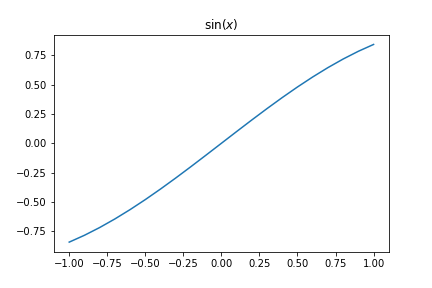

In [5]:
e2=Expr(sin) # predefined functions also work !
e2

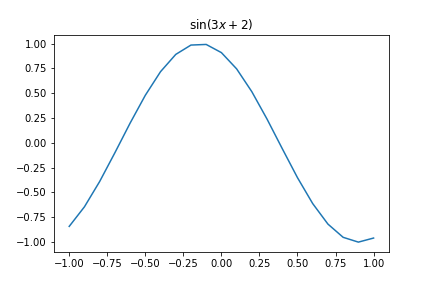

In [6]:
e3=e2(e1) #Expr can be composed
e3

In [7]:
print(e3(x=1)) # Expr can be evaluated as a function
print(e3((pi-4)/6)) #the x variable is implicit

-0.9589242746631385
1.0


In [8]:
e1([-2,1,0,1,2]) # Expr can be evaluated at different x values at once

[-4, 5, 2, 5, 8]

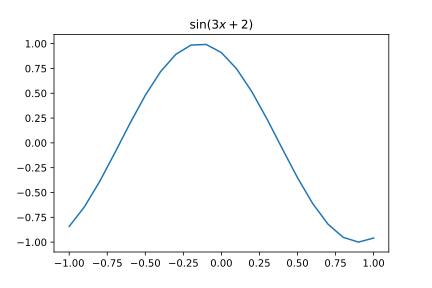

In [9]:
e3.plot()  # Expr can be also plotted

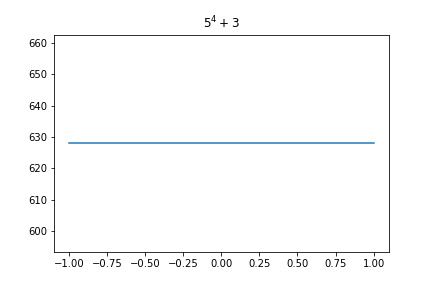

In [10]:
Expr('5**4+3')

In [11]:
Expr('5**4+3')()

628

In [12]:
e=Expr('a==a')
print(e,':',e())

a=a : True


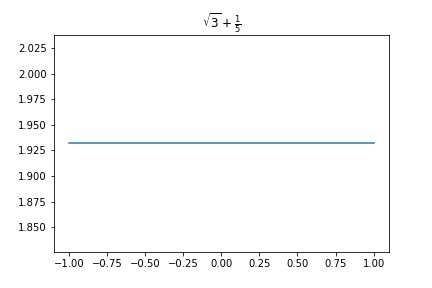

In [13]:
#Expr can also be used to embellish float numbers:
Expr(math.sqrt(3))+Expr(1/5)

## multivariable

In [18]:
e=Expr('sqrt(x*3+(a+b)*y)/x**(3*a*y)') #laTex is rendered with some simple simplifications
latex(e) #TODO : find why e default repr generates an error

<IPython.core.display.Math object>

In [15]:
latex(e(a=1)) # substitution doesn't work yet ...

<IPython.core.display.Math object>